In [5]:
import seaborn as sns
df=sns.load_dataset('titanic')
df.isnull().sum()



survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [21]:
del_row=df.dropna()
del_row

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


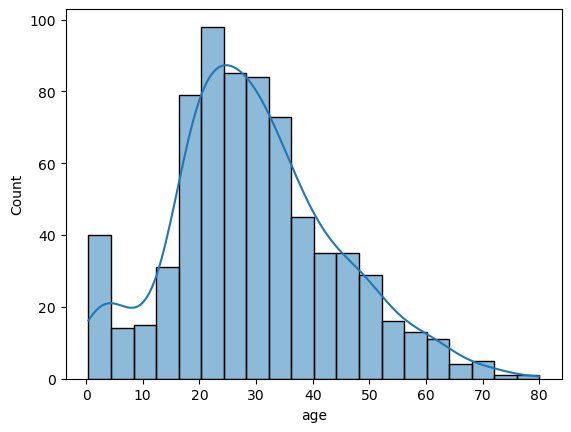

In [ ]:
# Imputation Mean Value
sns.histplot(df['age'],kde=True)
df['Age_mean']=df['age'].fillna(df['age'].mean())
# if normal distribution then  we can put mean values in nan
# df[['Age_mean','age']]


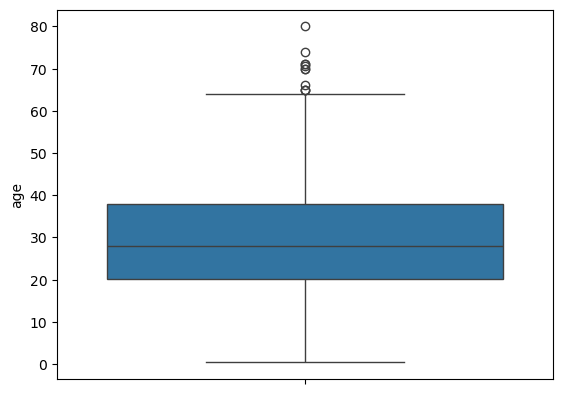

In [ ]:
# Median Value Imputation
sns.boxplot(df['age'])
df['age_median']=df['age'].fillna(df['age'].median())
# if have outliers use median
# df[['age_median','age']]

In [37]:
# Mode value Imputation 
df['embarked'].unique()
mode_val=df[df['embarked'].notna()]['embarked'].mode()[0]
df['embarked_mode']=df['embarked'].fillna(mode_val)
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [6]:
# Random Imputation Sampling technique
import numpy as np
non_null_values=df['age'].dropna()
np.random.seed(43)
df['Random_age']=df['age'].copy()
missing_mask=df['age'].isnull()
df.loc[missing_mask,'Random_age']=np.random.choice(non_null_values,size=missing_mask.sum(),replace=True)
df[['Random_age','age']]



# METHOD 2
# non_null_ages = df['age'].dropna()
# np.random.seed(42)  # for reproducibility

# df.loc[df['age'].isnull(), 'age'] = np.random.choice(non_null_ages, size=df['age'].isnull().sum(), replace=True)

,Random_age,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,50.0,NaN
889,26.0,26.0


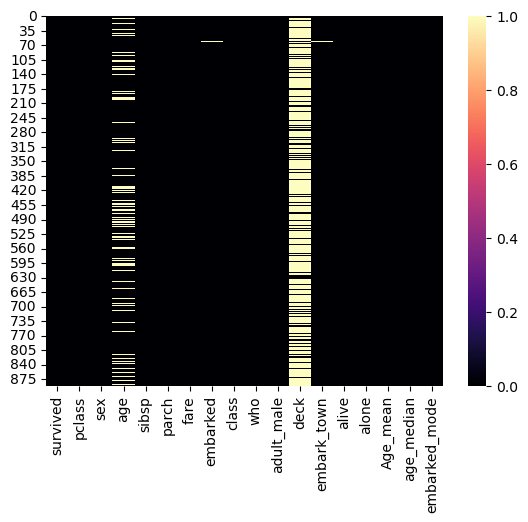

In [46]:
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),cmap='magma')
plt.show()